### Importando as dependencias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


###  Lendo a Base de Dados e analisando as primeiras informações

In [2]:
df_irrigacao = pd.read_csv('./dados_de_irrigacao.csv')

In [3]:
 df_irrigacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [4]:
df_irrigacao.head(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
5,6,600,400.000000
6,7,700,466.666667
7,8,800,533.333333
8,9,900,600.000000
9,10,1000,666.666667


In [5]:
df_irrigacao.tail(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
289,290,29000,19333.333333
290,291,29100,19400.000000
291,292,29200,19466.666667
292,293,29300,19533.333333
293,294,29400,19600.000000
294,295,29500,19666.666667
295,296,29600,19733.333333
296,297,29700,19800.000000
297,298,29800,19866.666667
298,299,29900,19933.333333


### EDA

In [6]:
df_irrigacao.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


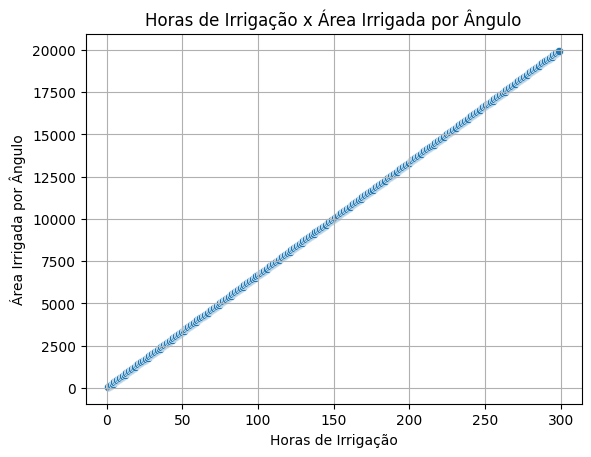

In [7]:
# grafico de dispersao (scatter plot)
plt.Figure(figsize=(10,6))
sns.scatterplot(data= df_irrigacao, x='Horas de Irrigação', y='Área Irrigada por Ângulo')
plt.title('Horas de Irrigação x Área Irrigada por Ângulo')
plt.xlabel('Horas de Irrigação')
plt.ylabel('Área Irrigada por Ângulo')
plt.grid(True)
plt.show()


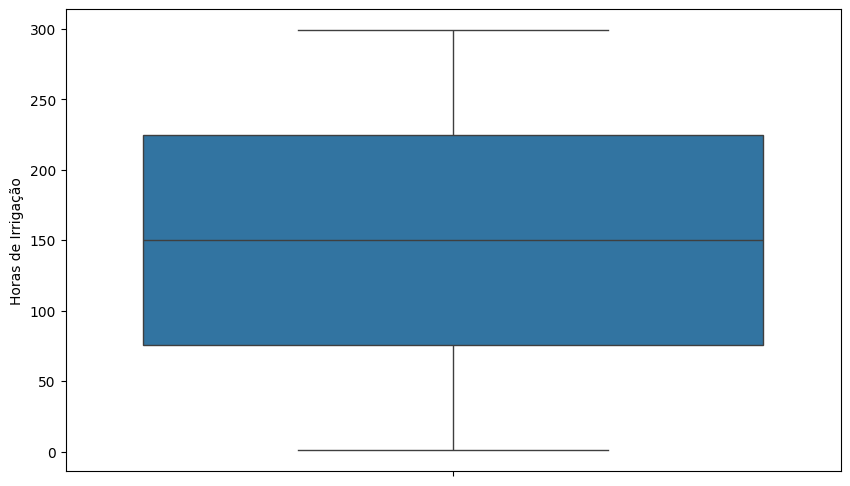

In [8]:
# BoxPlots

# horas de irrigacao
plt.figure(figsize=(10,6))
sns.boxplot(data=df_irrigacao, y='Horas de Irrigação')
plt.show()

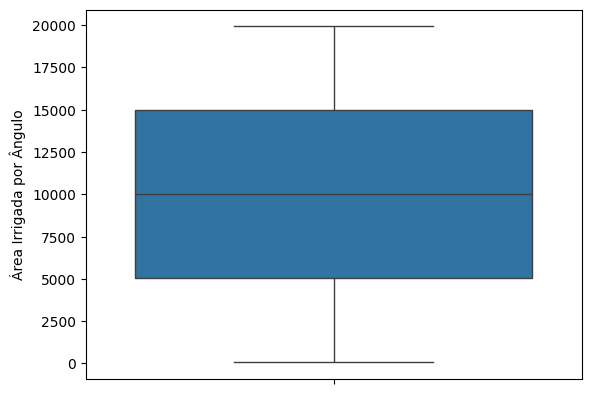

In [9]:
# area irrigada por angulo
plt.Figure(figsize=(10,6))
sns.boxplot(data=df_irrigacao, y='Área Irrigada por Ângulo')
plt.show()

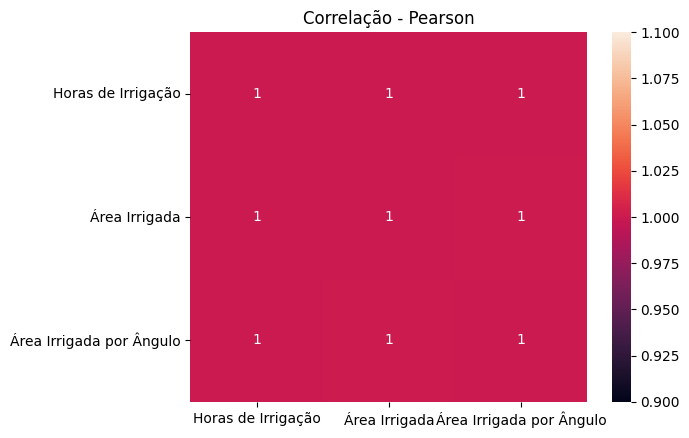

In [10]:
# correlacoes
plt.Figure(figsize=(10, 6))
sns.heatmap(df_irrigacao.corr(method='pearson'), annot=True)
plt.title('Correlação - Pearson')
plt.show()

### Construção e Treinamento do Modelo

In [11]:
X = df_irrigacao['Horas de Irrigação'].values.reshape(-1, 1)
y = df_irrigacao['Área Irrigada por Ângulo'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# instanciar e treinar o modelo
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# Mostrar a equacao da reta
coeficiente = reg_model.coef_[0][0]
intercepto = reg_model.intercept_[0]
print(f"Equação da reta: y = {coeficiente}x + {intercepto}")

Equação da reta: y = 66.66666666666667x + 1.8189894035458565e-12


### Validação do Modelo

In [14]:
# predicao dos valores
y_pred = reg_model.predict(X_test)

In [ ]:
# metricas
mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.abs(y_test - y_pred))

# imprimindo
print(f"MSE: {mse}")
print(f"MAE: {mae}")


MSE: 8.248757082420076e-24
MAE: 2.559848629365054e-12


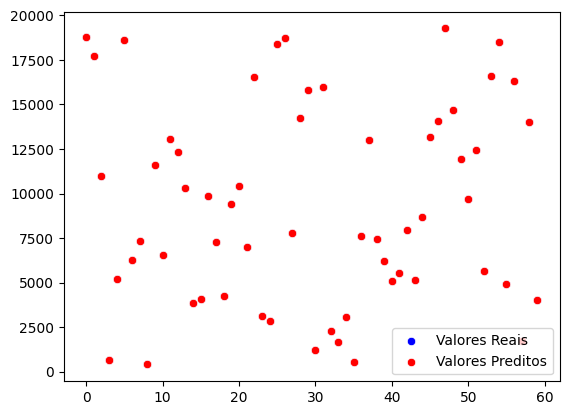

In [21]:
# analise grafica
plt.Figure(figsize=(10, 6))
sns.scatterplot(x=range(len(y_test)), y=y_test.flatten(), color='blue', label='Valores Reais')
sns.scatterplot(x=range(len(y_test)), y=y_pred.flatten(), color='red', label='Valores Preditos')
plt.legend()
plt.show()

### Insights sobre a análise

 1. **Relação Linear:**
    A relação entre as horas de irrigação e a área de irrigada por ângulo é linear, como o esperado. 
 2. **Desempenho do modelo:** 
    De acordo com as métricas de erro (MAE e MSE), indicam que o modelo de regressão linear é adequado para a predição de área irrigada por ângulo com base nas horas de irrigação.
 3. **Análise de Resiuos:** 
    As análises de resíduos mostram que os resíduos são aproximadamente normais, indicando que as suposições do modelo de regressão linear são válidas.
 4. **Previsões:**
    O modelo é capaz de realizar predições de área irrigada por ângulo dada uma quantidade específica de horas de irrigação.


### Predição - Exemplo

In [25]:
# realziando uma predicao de exemplo
horas_exemplo = np.array([[15]])
area_predita = reg_model.predict(horas_exemplo)

print(f"Para 15 horas de irrigação, a área irrigada por ângulo prevista é {area_predita[0][0]}")

Para 15 horas de irrigação, a área irrigada por ângulo prevista é 1000.0000000000019
